# Predicting student final grade using machine learning

*This machine learning model is capable of predicting students final grades based on school attributes.*

## 1. Problem Definition
> The goal of this project is to create a predictive model that can forecast a student's final grade using features such as attendance, previous academic performance, socio-economic background, engagement in school activities, and other relevant attributes.

## 2. Data
The original data came from here: https://archive.ics.uci.edu/dataset/320/student+performance

## 3. Evaluation
> If the model can reach 93% accuracy at predicting students final grade, we will persue the project.
## 4. Features

Data dictionary for this project can be found under this link: https://www.kaggle.com/datasets/whenamancodes/student-performance/data or https://archive.ics.uci.edu/dataset/320/student+performance

In [ ]:
# Importing needed tools

# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from pathlib import Path
from joblib import dump, load

# Models from scikit-learn
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.svm import SVR

# Pipeline and preprocessing tools from scikit-learn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

# Model Evaluation tools from scikit-learn
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/CpuKing/datasets/main/student-mat.csv', sep=';')

In [ ]:
len(df)

395

In [ ]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [ ]:
df = df.rename(columns={'famsize': 'Family_size', 'Pstatus': 'Parent_status', 'Medu': 'Mothers_education', 'Fedu': 'Father_education', 'Mjob':'Mothers_job', 'Fjob':'Fathers_job', 'schoolsup': 'School_support', 'famsup':'Family_education_support'})

In [ ]:
df.head().T

,0,1,2,3,4
school,GP,GP,GP,GP,GP
sex,F,F,F,F,F
age,18,17,15,15,16
address,U,U,U,U,U
Family_size,GT3,GT3,LE3,GT3,GT3
Parent_status,A,T,T,T,T
Mothers_education,4,1,1,4,3
Father_education,4,1,1,2,3
Mothers_job,at_home,at_home,at_home,health,other
Fathers_job,teacher,other,other,services,other


In [ ]:
df.isna().sum()

,0
school,0
sex,0
age,0
address,0
Family_size,0
Parent_status,0
Mothers_education,0
Father_education,0
Mothers_job,0
Fathers_job,0


### Finding patterns in the data

In [ ]:
df.head()

,school,sex,age,address,Family_size,Parent_status,Mothers_education,Father_education,Mothers_job,Fathers_job,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


#### Final Grades by Parent Status

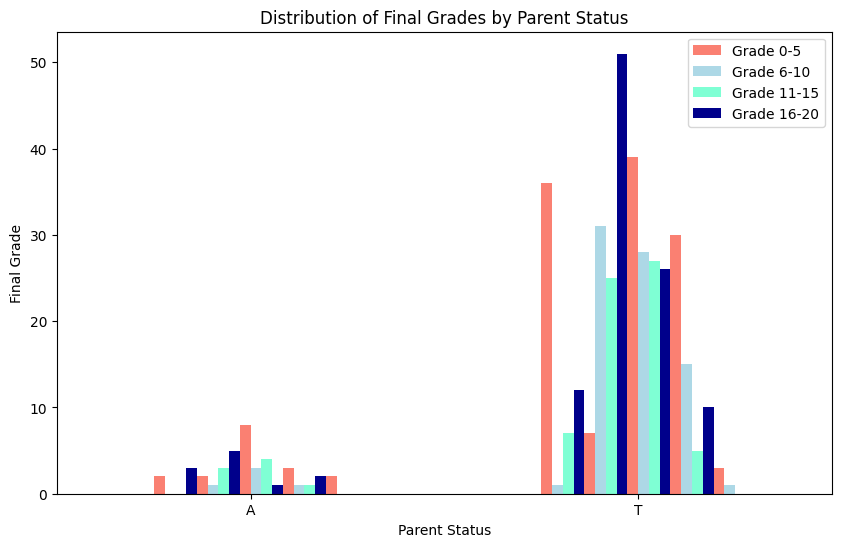

In [ ]:
# Create a plot of crosstab
pd.crosstab(df['Parent_status'], df['G3']).plot(kind='bar',
                                          figsize=(10,6),
                                          color=['salmon', 'lightblue', 'aquamarine', 'darkblue']);
plt.title('Distribution of Final Grades by Parent Status')
plt.xlabel('Parent Status')
plt.ylabel('Final Grade')
plt.legend(['Grade 0-5', 'Grade 6-10', 'Grade 11-15', 'Grade 16-20'])
plt.xticks(rotation=0)
plt.show();

#### Final Grades by freetime

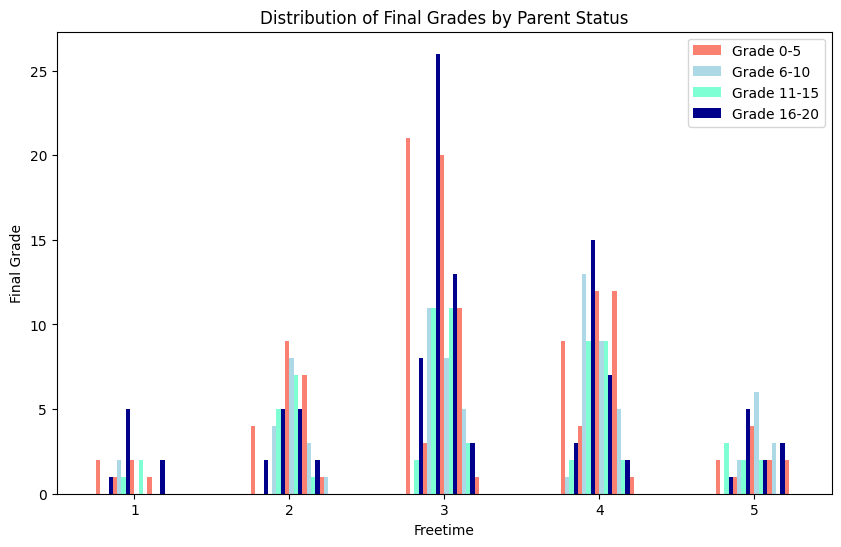

In [ ]:
# Create a plot of crosstab
pd.crosstab(df['freetime'], df['G3']).plot(kind='bar',
                                          figsize=(10,6),
                                          color=['salmon', 'lightblue', 'aquamarine', 'darkblue']);
plt.title('Distribution of Final Grades by Parent Status')
plt.xlabel('Freetime')
plt.ylabel('Final Grade')
plt.legend(['Grade 0-5', 'Grade 6-10', 'Grade 11-15', 'Grade 16-20'])
plt.xticks(rotation=0)
plt.show();

## 5. Modeling

### Feature Scaling

In [ ]:
df.isna().sum()

,0
school,0
sex,0
age,0
address,0
Family_size,0
Parent_status,0
Mothers_education,0
Father_education,0
Mothers_job,0
Fathers_job,0


In [ ]:
df.dtypes

,0
school,object
sex,object
age,int64
address,object
Family_size,object
Parent_status,object
Mothers_education,int64
Father_education,int64
Mothers_job,object
Fathers_job,object


In [ ]:
# Creating a categorical_column list
categorical_columns = []

# Finding all categorical columns in df and appending all to list
for label, content in df.items():
  if pd.api.types.is_object_dtype(content):
    categorical_columns.append(label)
    print(label)

school
sex
address
Family_size
Parent_status
Mothers_job
Fathers_job
reason
guardian
School_support
Family_education_support
paid
activities
nursery
higher
internet
romantic


In [ ]:
# Splitting data into train, valid and test datasets
train, valid, test = np.split(df.sample(frac=1, random_state=42), [int(0.6*len(df)), int(0.8*len(df))])
print(len(train), len(valid), len(test))

237 79 79


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
# Splitting previously create datasets(train, test and valid) into X & y
X_train = train.drop(columns=['G3'], axis=1)
y_train = train['G3']
X_valid = valid.drop(columns=['G3'], axis=1)
y_valid = valid['G3']
X_test = test.drop(columns=['G3'], axis=1)
y_test = test['G3']

In [ ]:
# Setting up preprocessor with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_columns),
        ('num', StandardScaler(), X_train.columns.difference(categorical_columns))
    ],
    remainder='passthrough'
)

### Creating a function for evaluting the model

In [ ]:
def evaluate_preds(y_true, y_preds):
  """
  Performs evaluation on y_true labels vs y_preds labels
  On a regression model
  """
  r2 = r2_score(y_true, y_preds)
  mse = mean_squared_error(y_true, y_preds)
  mae = mean_absolute_error(y_true, y_preds)
  print(f'R2 Score: {r2}')
  print(f'Mean Absolute Error: {mae}')
  print(f'Mean Squared Error: {mse}')

  return np.array([r2, mae, mse])

### Finding out which model performs the best on our dataset

In [ ]:
# Finding the best model
models = {
    'RandomForestRegressor': RandomForestRegressor(),
    'SVR(rbf)': SVR(kernel='rbf'),
    'SVR(linear)': SVR(kernel='linear'),
    'RidgeRegression': Ridge(),
    'LinearRegression': LinearRegression()
}

# Creating a dictionary of each models evaluation score
model_results = {}

In [ ]:
# Loop through the items in the regression_models dictionary
for model_name, model in models.items():

    # Create a model Pipeline with a preprocessor step and model step
    model_pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                                      ("model", model)])

    # Fit the model Pipeline to the training data
    print(f"Fitting {model_name}...")
    model_pipeline.fit(X_train, y_train)

    # Score the model Pipeline on the test data appending the model_name to the
    # results dictionary
    print(f"Scoring {model_name}...")
    y_preds = model_pipeline.predict(X_valid)
    model_results[model_name] = evaluate_preds(y_valid, y_preds)

Fitting RandomForestRegressor...


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Scoring RandomForestRegressor...
R2 Score: 0.8840975257449537
Mean Absolute Error: 1.0253164556962029
Mean Squared Error: 2.9827848101265824
Fitting SVR(rbf)...
Scoring SVR(rbf)...
R2 Score: 0.6611863026230889
Mean Absolute Error: 1.866048709512254
Mean Squared Error: 8.719471749798943
Fitting SVR(linear)...
Scoring SVR(linear)...
R2 Score: 0.8214097934633522
Mean Absolute Error: 1.1242041035177026
Mean Squared Error: 4.596072333388424
Fitting RidgeRegression...
Scoring RidgeRegression...
R2 Score: 0.8483520121714636
Mean Absolute Error: 1.1965858819898003
Mean Squared Error: 3.9027062837834565
Fitting LinearRegression...
Scoring LinearRegression...
R2 Score: 0.8464540584906741
Mean Absolute Error: 1.2138795490506329
Mean Squared Error: 3.9515506889246685


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

In [ ]:
# Checking model accuracy
model_results

{'RandomForestRegressor': array([0.88409753, 1.02531646, 2.98278481]),
 'SVR(rbf)': array([0.6611863 , 1.86604871, 8.71947175]),
 'SVR(linear)': array([0.82140979, 1.1242041 , 4.59607233]),
 'RidgeRegression': array([0.84835201, 1.19658588, 3.90270628]),
 'LinearRegression': array([0.84645406, 1.21387955, 3.95155069])}

In [ ]:
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", RandomForestRegressor())])

### Hyperparameter Tuning with `RandomizedSearchCV()` on RandomForestRegressor model

In [ ]:
# Different hyperparameters for RandomForestRegressor model
rs_grid = {'model__bootstrap': [True, False],
 'model__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'model__max_features': ['auto', 'sqrt'],
 'model__min_samples_leaf': [1, 2, 4],
 'model__min_samples_split': [2, 5, 10],
 'model__n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

# Setup randomized hyperparameter search for RandomForestRegressor
rs_model = RandomizedSearchCV(model, param_distributions=rs_grid, cv=5, n_iter=5, verbose=3, random_state=42, n_jobs = -1)

# Fit grid hyperparameter search model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('cat',
                                                                               OneHotEncoder(handle_unknown='ignore',
                                                                                             sparse=False),
                                                                               ['school',
                                                                                'sex',
                                                                                'address',
                                                                                'Family_size',
                                                                                'Parent_status',
                                                                                'Mothers_job',
                                                                                'Fathers_job',
                                                                                'reason',
                                                                                'guardian',
                                                                                'School_support',
                                                                                'Family_education_support',
                                                                                'paid',
                                                                                'activities',
                                                                                '...
                                              RandomForestRegressor())]),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'model__bootstrap': [True, False],
                                        'model__max_depth': [10, 20, 30, 40, 50,
                                                             60, 70, 80, 90,
                                                             100, None],
                                        'model__max_features': ['auto', 'sqrt'],
                                        'model__min_samples_leaf': [1, 2, 4],
                                        'model__min_samples_split': [2, 5, 10],
                                        'model__n_estimators': [200, 400, 600,
                                                                800, 1000, 1200,
                                                                1400, 1600,
                                                                1800, 2000]},
                   random_state=42, verbose=3)

In [ ]:
# Best parameters of RandomForestRegressor out of 5 different hyperparameter combinations(n_iter=5)
rs_model.best_params_

{'model__n_estimators': 1000,
 'model__min_samples_split': 10,
 'model__min_samples_leaf': 1,
 'model__max_features': 'sqrt',
 'model__max_depth': 70,
 'model__bootstrap': False}

In [ ]:
# Evaluating the randomized search RandomForestRegressor model
y_preds = rs_model.predict(X_valid)
evaluate_preds(y_valid, y_preds)

R2 Score: 0.7148011422487052
Mean Absolute Error: 1.8736290486236689
Mean Squared Error: 7.339677830294258


array([0.71480114, 1.87362905, 7.33967783])

### Hyperparameter tuning using `GridSearchCV()` on RandomForestRegressor model

In [ ]:
np.random.seed(42)

# Different hyperparameters for RandomForestRegressor model
gs_grid = {'model__bootstrap': [True],
#  'model__max_depth': [60, 70, 80, 90, 100],
 'model__max_features': ['sqrt'],
#  'model__min_samples_leaf': [1, 2, 4],
#  'model__min_samples_split': [2, 5, 10],
 'model__n_estimators': [100, 200, 300, 800, 1000]}

# Setup grid hyperparameter search for RandomForestRegressor
grid_model = GridSearchCV(model, param_grid=gs_grid, n_jobs=-1, verbose=3, cv=5)

# Fit grid hyperparameter search model
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['school',
                                                                          'sex',
                                                                          'address',
                                                                          'Family_size',
                                                                          'Parent_status',
                                                                          'Mothers_job',
                                                                          'Fathers_job',
                                                                          'reason',
                                                                          'guardian',
                                                                          'School_support',
                                                                          'Family_education_support',
                                                                          'paid',
                                                                          'activities',
                                                                          'nurser...
                                                                         Index(['Dalc', 'Father_education', 'G1', 'G2', 'Mothers_education', 'Walc',
       'absences', 'age', 'failures', 'famrel', 'freetime', 'goout', 'health',
       'studytime', 'traveltime'],
      dtype='object'))])),
                                       ('model', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'model__bootstrap': [True],
                         'model__max_features': ['sqrt'],
                         'model__n_estimators': [100, 200, 300, 800, 1000]},
             verbose=3)

In [ ]:
grid_model.best_params_

{'model__bootstrap': True,
 'model__max_features': 'sqrt',
 'model__n_estimators': 1000}

In [ ]:
# Evaluating the grid search RandomForestRegressor model

y_preds = grid_model.predict(X_valid)

best_results = evaluate_preds(y_valid, y_preds)

R2 Score: 0.7032097092345624
Mean Absolute Error: 1.8934556962025317
Mean Squared Error: 7.63798682278481


In [ ]:
# Comparing results before and after hyperparameter tuning
model_results

{'RandomForestRegressor': array([0.88409753, 1.02531646, 2.98278481]),
 'SVR(rbf)': array([0.6611863 , 1.86604871, 8.71947175]),
 'SVR(linear)': array([0.82140979, 1.1242041 , 4.59607233]),
 'RidgeRegression': array([0.84835201, 1.19658588, 3.90270628]),
 'LinearRegression': array([0.84645406, 1.21387955, 3.95155069])}

# Hyperparameter tuning for a RidgeRegression

In [ ]:
# Instantiating a RidgeRegression model
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", Ridge())])

In [ ]:
# Different hyperparameters for randomized search cv
rr_grid = {'model__alpha': [1.0, 1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}

# Setting a randomized search cv for hyperparameter tuning
rr_model = RandomizedSearchCV(model, param_distributions=rr_grid, cv=5, n_iter=5, verbose=3, random_state=42, n_jobs=-1)

# Fitting the data to the model
rr_model.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('cat',
                                                                               OneHotEncoder(handle_unknown='ignore',
                                                                                             sparse=False),
                                                                               ['school',
                                                                                'sex',
                                                                                'address',
                                                                                'Family_size',
                                                                                'Parent_status',
                                                                                'Mothers_job',
                                                                                'Fathers_job',
                                                                                'reason',
                                                                                'guardian',
                                                                                'School_support',
                                                                                'Family_education_support',
                                                                                'paid',
                                                                                'activities',
                                                                                '...
                                                                               Index(['Dalc', 'Father_education', 'G1', 'G2', 'Mothers_education', 'Walc',
       'absences', 'age', 'failures', 'famrel', 'freetime', 'goout', 'health',
       'studytime', 'traveltime'],
      dtype='object'))])),
                                             ('model', Ridge())]),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'model__alpha': [1.0, 1e-15, 1e-10,
                                                         1e-08, 0.001, 0.01, 1,
                                                         5, 10, 20, 30, 35, 40,
                                                         45, 50, 55, 100]},
                   random_state=42, verbose=3)

In [ ]:
rr_model.best_params_

{'model__alpha': 35}

In [ ]:
y_preds = rr_model.predict(X_test)

In [ ]:
evaluate_preds(y_test, y_preds)

R2 Score: 0.7599894305279057
Mean Absolute Error: 1.2463551819686145
Mean Squared Error: 4.322036189823874


array([0.75998943, 1.24635518, 4.32203619])

In [ ]:
model_results

{'RandomForestRegressor': array([0.88409753, 1.02531646, 2.98278481]),
 'SVR(rbf)': array([0.6611863 , 1.86604871, 8.71947175]),
 'SVR(linear)': array([0.82140979, 1.1242041 , 4.59607233]),
 'RidgeRegression': array([0.84835201, 1.19658588, 3.90270628]),
 'LinearRegression': array([0.84645406, 1.21387955, 3.95155069])}

### Hyperparameter tuning using `GridSearchCV` on our RidgeRegression model

In [ ]:
np.random.seed(42)

# Different hyperparameters for grid search cv
gs_grid = {'model__alpha': [1.0, 1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}

rr_model = GridSearchCV(model, param_grid=gs_grid, n_jobs=-1, verbose=3, cv=5)

# Fitting the model to the data
rr_model.fit(X_train, y_train)

Fitting 5 folds for each of 17 candidates, totalling 85 fits


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['school',
                                                                          'sex',
                                                                          'address',
                                                                          'Family_size',
                                                                          'Parent_status',
                                                                          'Mothers_job',
                                                                          'Fathers_job',
                                                                          'reason',
                                                                          'guardian',
                                                                          'School_support',
                                                                          'Family_education_support',
                                                                          'paid',
                                                                          'activities',
                                                                          'nurser...
                                                                          'romantic']),
                                                                        ('num',
                                                                         StandardScaler(),
                                                                         Index(['Dalc', 'Father_education', 'G1', 'G2', 'Mothers_education', 'Walc',
       'absences', 'age', 'failures', 'famrel', 'freetime', 'goout', 'health',
       'studytime', 'traveltime'],
      dtype='object'))])),
                                       ('model', Ridge())]),
             n_jobs=-1,
             param_grid={'model__alpha': [1.0, 1e-15, 1e-10, 1e-08, 0.001, 0.01,
                                          1, 5, 10, 20, 30, 35, 40, 45, 50, 55,
                                          100]},
             verbose=3)

In [ ]:
rr_model.best_params_

{'model__alpha': 20}

In [ ]:
y_preds = rr_model.predict(X_test)
evaluate_preds(y_test, y_preds)

R2 Score: 0.7707871326884896
Mean Absolute Error: 1.211323023856259
Mean Squared Error: 4.127594504994617


array([0.77078713, 1.21132302, 4.1275945 ])

In [ ]:
model_results

{'RandomForestRegressor': array([0.88409753, 1.02531646, 2.98278481]),
 'SVR(rbf)': array([0.6611863 , 1.86604871, 8.71947175]),
 'SVR(linear)': array([0.82140979, 1.1242041 , 4.59607233]),
 'RidgeRegression': array([0.84835201, 1.19658588, 3.90270628]),
 'LinearRegression': array([0.84645406, 1.21387955, 3.95155069])}

# Hyperparameter tuning using `RandomizedSearchCV()` on a LinearRegression model

In [ ]:
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", LinearRegression())])

In [ ]:
np.random.seed(42)

rs_grid = {
    'model__copy_X': [True,False],
    'model__fit_intercept': [True,False],
    'model__n_jobs': [1,5,10,15,None],
    'model__positive': [True,False]
}

rs_model = RandomizedSearchCV(model, rs_grid, n_iter=10, n_jobs=-1, cv=5, verbose=3)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('cat',
                                                                               OneHotEncoder(handle_unknown='ignore',
                                                                                             sparse=False),
                                                                               ['school',
                                                                                'sex',
                                                                                'address',
                                                                                'Family_size',
                                                                                'Parent_status',
                                                                                'Mothers_job',
                                                                                'Fathers_job',
                                                                                'reason',
                                                                                'guardian',
                                                                                'School_support',
                                                                                'Family_education_support',
                                                                                'paid',
                                                                                'activities',
                                                                                '...
                                                                               Index(['Dalc', 'Father_education', 'G1', 'G2', 'Mothers_education', 'Walc',
       'absences', 'age', 'failures', 'famrel', 'freetime', 'goout', 'health',
       'studytime', 'traveltime'],
      dtype='object'))])),
                                             ('model', LinearRegression())]),
                   n_jobs=-1,
                   param_distributions={'model__copy_X': [True, False],
                                        'model__fit_intercept': [True, False],
                                        'model__n_jobs': [1, 5, 10, 15, None],
                                        'model__positive': [True, False]},
                   verbose=3)

In [ ]:
rs_model.best_params_

{'model__positive': True,
 'model__n_jobs': 15,
 'model__fit_intercept': False,
 'model__copy_X': True}

In [ ]:
X_train

,school,sex,age,address,Family_size,Parent_status,Mothers_education,Father_education,Mothers_job,Fathers_job,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
78,GP,M,17,U,GT3,T,2,1,other,other,...,no,4,5,1,1,1,3,2,8,8
371,MS,M,18,R,LE3,T,1,2,at_home,services,...,yes,4,3,3,2,3,3,3,14,12
248,GP,M,18,R,LE3,T,3,3,other,services,...,yes,4,3,3,1,3,5,8,3,5
55,GP,F,16,U,GT3,A,2,1,other,other,...,yes,5,3,4,1,1,2,8,8,9
390,MS,M,20,U,LE3,A,2,2,services,services,...,no,5,5,4,4,5,4,11,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,GP,F,18,U,LE3,T,3,3,services,services,...,no,5,3,3,1,1,1,7,16,15
311,GP,F,19,U,GT3,T,2,1,at_home,other,...,yes,3,4,1,1,1,2,20,14,12
340,GP,F,19,U,GT3,T,2,1,services,services,...,yes,4,3,4,1,3,3,4,11,12
127,GP,F,19,U,GT3,T,0,1,at_home,other,...,no,3,4,2,1,1,5,2,7,8


In [ ]:
gs_grid = {
    'model__copy_X': [True,False],
    'model__fit_intercept': [True,False],
    'model__n_jobs': [1,5,10,15,None],
    'model__positive': [True,False]
}

gs_model = GridSearchCV(model, gs_grid, n_jobs=-1, cv=5, verbose=3)

gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['school',
                                                                          'sex',
                                                                          'address',
                                                                          'Family_size',
                                                                          'Parent_status',
                                                                          'Mothers_job',
                                                                          'Fathers_job',
                                                                          'reason',
                                                                          'guardian',
                                                                          'School_support',
                                                                          'Family_education_support',
                                                                          'paid',
                                                                          'activities',
                                                                          'nurser...
                                                                         Index(['Dalc', 'Father_education', 'G1', 'G2', 'Mothers_education', 'Walc',
       'absences', 'age', 'failures', 'famrel', 'freetime', 'goout', 'health',
       'studytime', 'traveltime'],
      dtype='object'))])),
                                       ('model', LinearRegression())]),
             n_jobs=-1,
             param_grid={'model__copy_X': [True, False],
                         'model__fit_intercept': [True, False],
                         'model__n_jobs': [1, 5, 10, 15, None],
                         'model__positive': [True, False]},
             verbose=3)

In [ ]:
y_preds = gs_model.predict(X_valid)

evaluate_preds(y_valid, y_preds)

R2 Score: 0.8458427525944117
Mean Absolute Error: 1.1654847464262876
Mean Squared Error: 3.9672828288417197


array([0.84584275, 1.16548475, 3.96728283])

In [ ]:
gs_model.best_params_

{'model__copy_X': True,
 'model__fit_intercept': False,
 'model__n_jobs': 1,
 'model__positive': True}

In [ ]:
def save_model(path_name, model_name, estimator):
  """
  Saves a model to a newly created folder.
  """
  # Create model's directory
  model_path = Path(f'{path_name}')
  model_path.mkdir(parents=True, exist_ok=True)

  # Create model save path
  model_name = f'{model_name}'
  model_save_path = model_path / model_name

  # Save the model state dict
  print(f'Saving model to: {model_save_path}')
  dump(value=estimator, filename=model_save_path)

In [ ]:
X_train

,school,sex,age,address,Family_size,Parent_status,Mothers_education,Father_education,Mothers_job,Fathers_job,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
78,GP,M,17,U,GT3,T,2,1,other,other,...,no,4,5,1,1,1,3,2,8,8
371,MS,M,18,R,LE3,T,1,2,at_home,services,...,yes,4,3,3,2,3,3,3,14,12
248,GP,M,18,R,LE3,T,3,3,other,services,...,yes,4,3,3,1,3,5,8,3,5
55,GP,F,16,U,GT3,A,2,1,other,other,...,yes,5,3,4,1,1,2,8,8,9
390,MS,M,20,U,LE3,A,2,2,services,services,...,no,5,5,4,4,5,4,11,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,GP,F,18,U,LE3,T,3,3,services,services,...,no,5,3,3,1,1,1,7,16,15
311,GP,F,19,U,GT3,T,2,1,at_home,other,...,yes,3,4,1,1,1,2,20,14,12
340,GP,F,19,U,GT3,T,2,1,services,services,...,yes,4,3,4,1,3,3,4,11,12
127,GP,F,19,U,GT3,T,0,1,at_home,other,...,no,3,4,2,1,1,5,2,7,8


In [ ]:
model = Pipeline(steps=[("preprocessor", preprocessor),
                          ("model", LinearRegression(copy_X= True,fit_intercept= False,n_jobs= 1, positive= True))])
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['school', 'sex', 'address',
                                                   'Family_size',
                                                   'Parent_status',
                                                   'Mothers_job', 'Fathers_job',
                                                   'reason', 'guardian',
                                                   'School_support',
                                                   'Family_education_support',
                                                   'paid', 'activities',
                                                   'nursery', 'higher',
                                                   'internet', 'romantic']),
                                                 ('num', StandardScaler(),
                                                  Index(['Dalc', 'Father_education', 'G1', 'G2', 'Mothers_education', 'Walc',
       'absences', 'age', 'failures', 'famrel', 'freetime', 'goout', 'health',
       'studytime', 'traveltime'],
      dtype='object'))])),
                ('model',
                 LinearRegression(fit_intercept=False, n_jobs=1,
                                  positive=True))])

In [ ]:
y_preds = model.predict(X_test)
evaluate_preds(y_test, y_preds)

R2 Score: 0.7719547297400748
Mean Absolute Error: 1.2205967426078994
Mean Squared Error: 4.106568777989418


array([0.77195473, 1.22059674, 4.10656878])

In [ ]:
save_model('models', 'model.joblib', model)

Saving model to: models/model.joblib
